### Movie Recommender (Using KNN and Cosine Distance)

In [106]:
import numpy as np
import pandas as pd

In [107]:
df1 = pd.read_csv('Dataset\movie_small.csv')
df2 = pd.read_csv('Dataset\\ratings_small.csv')

In [108]:
movie = pd.DataFrame()
movie = pd.merge(df1,df2, on = 'movieId')

In [109]:
movie.drop(['genres'],axis = 1, inplace = True)
movie

,movieId,title,userId,rating
0,1,Toy Story (1995),6,5.0
1,1,Toy Story (1995),8,4.0
2,1,Toy Story (1995),10,4.0
3,1,Toy Story (1995),23,4.0
4,1,Toy Story (1995),39,5.0
...,...,...,...,...
2926,72737,"Princess and the Frog, The (2009)",4089,4.0
2927,72998,Avatar (2009),4089,4.5
2928,73017,Sherlock Holmes (2009),4089,4.5
2929,74789,Alice in Wonderland (2010),4089,4.5


In [110]:
movie['title'] = movie['title'].str.rsplit(' (',n = 1).str[0]
movie

,movieId,title,userId,rating
0,1,Toy Story,6,5.0
1,1,Toy Story,8,4.0
2,1,Toy Story,10,4.0
3,1,Toy Story,23,4.0
4,1,Toy Story,39,5.0
...,...,...,...,...
2926,72737,"Princess and the Frog, The",4089,4.0
2927,72998,Avatar,4089,4.5
2928,73017,Sherlock Holmes,4089,4.5
2929,74789,Alice in Wonderland,4089,4.5


In [111]:
movie.dropna(subset=['title', 'userId', 'rating'], inplace=True)

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
ratings = pd.DataFrame(movie.groupby('title')['rating'].mean())
ratings['no. of ratings'] = pd.DataFrame(movie.groupby('title')['rating'].count())
ratings

,rating,no. of ratings
title,,
'Round Midnight,4.000000,1
10 Things I Hate About You,4.250000,2
101 Dalmatians,3.500000,1
1492: Conquest of Paradise,3.000000,1
1900 (Novecento),3.000000,1
...,...,...
Zack and Miri Make a Porno,3.500000,1
Zoolander,2.250000,2
[REC],4.000000,1


<Axes: >

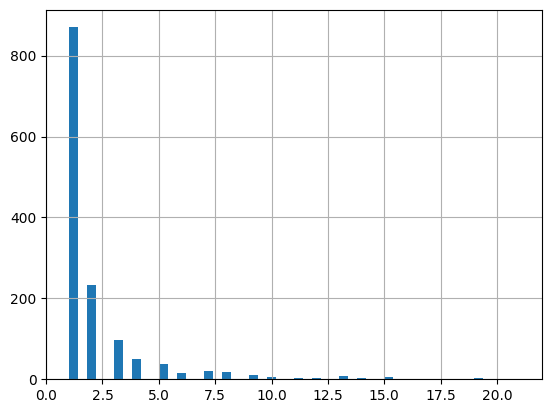

In [114]:
plt.Figure(figsize = (10,4))
ratings['no. of ratings'].hist(bins = 50)

<Axes: >

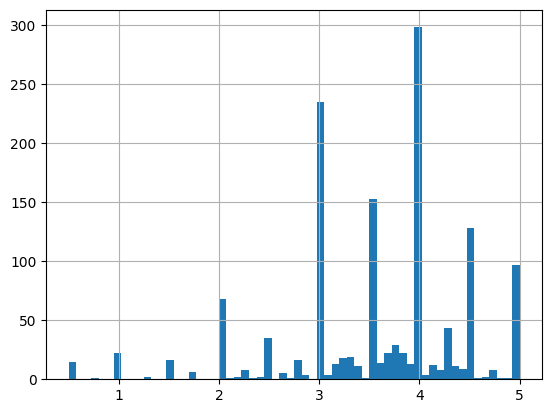

In [115]:
plt.Figure(figsize = (10,4))
ratings['rating'].hist(bins = 60)

In [116]:
moviemat = pd.pivot_table(movie, index = 'title', columns = 'userId', values = 'rating', aggfunc='mean')
moviemat.fillna(moviemat.mean(),inplace = True)
moviemat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6778,6779,6781,6783,6784,6793,6794,6989,7119,7120
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight,3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.475,3.88,4.125
10 Things I Hate About You,3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.475,3.88,4.125
101 Dalmatians,3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.475,3.88,4.125
1492: Conquest of Paradise,3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.475,3.88,4.125
1900 (Novecento),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.475,3.88,4.125


In [117]:
from scipy.sparse import csr_matrix
movie_matrix = csr_matrix(moviemat.values)
movie_matrix

<1382x83 sparse matrix of type '<class 'numpy.float64'>'
	with 114706 stored elements in Compressed Sparse Row format>

In [118]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [119]:

np.random.seed(5)
movie_id = np.random.choice(moviemat.shape[0])
distances, indices = model.kneighbors(moviemat.iloc[movie_id,:].values.reshape(1,-1),n_neighbors=6)
print(distances)
print(indices)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.11011002e-06 5.11011002e-06]]
[[ 141  867 1032 1118  200 1028]]


In [120]:
d = distances.flatten()
for i in range(0,len(d)):
    if i == 0:
        print("Recommendation for {0}: \n".format(moviemat.index[movie_id]))
    else:
        ind = moviemat.index[indices.flatten()]
        print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))


Recommendation for My Winnipeg: 

1: My Winnipeg with distance: 0.0

2: Ricochet with distance: 0.0

3: Simpsons Movie, The with distance: 0.0

4: Bridge on the River Kwai, The with distance: 5.1101100154715695e-06

5: Return of the Fly with distance: 5.1101100154715695e-06



In [121]:
import pickle 
saved_model = pickle.dump(model,open('model.pkl','wb'))

In [122]:
with open('moviemat.pkl', 'wb') as f:
    p = pickle.dump(moviemat, f)

In [123]:
def recommend1(movieName):
    distances, indices = model.kneighbors(moviemat.loc[movieName,:].values.reshape(1,-1),n_neighbors=7)
    print(distances)
    print(indices)
    d = distances.flatten()
    for i in range(0,len(d)):
        if i == 0:
            print("\nRecommendation for {0}: \n".format(movieName))
        else:
            ind = moviemat.index[indices.flatten()]
            print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))

In [124]:
recommend1("Toy Story")

[[0.         0.00252588 0.00264953 0.00309885 0.0031368  0.0031368
  0.0031368 ]]
[[1264  336 1070  123  307  192  210]]

Recommendation for Toy Story: 

1: Dead Man Walking with distance: 0.002525876674611238

2: Sabrina with distance: 0.0026495258518797193

3: Basquiat with distance: 0.003098850264207975

4: Cry, the Beloved Country with distance: 0.003136798408228225

5: Boys of St. Vincent, The with distance: 0.003136798408228225

6: Browning Version, The with distance: 0.003136798408228225



In [130]:
def recommend2(movieName):
    if movieName not in moviemat.index:
        df = pd.DataFrame()
        # print("Sorry, no recommendations. Please try some other movie.")
        return df
    else:
        distances, indices = model.kneighbors(moviemat.loc[movieName,:].values.reshape(1,-1),n_neighbors=7)
        movie_list = {}
        print(distances)
        print(indices)
        d = distances.flatten()
        for i in range(0,len(d)):
            if i > 0:
                ind = moviemat.index[indices.flatten()]
                # print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))
                movie_list[ind[i]] = d[i]
        df = pd.DataFrame(movie_list.items(), columns=['Movie Name','Closeness'])
        return df

In [136]:
recommendations = recommend2("Before and After")
if recommendations.empty:
    print("Sorry, no recommendations. Please try some other movie.")
else:
    print(recommendations)

Sorry, no recommendations. Please try some other movie.


In [127]:
table = recommendations.values.tolist()
table

[['Waiting to Exhale', 0.0008936313719998257],
 ['Mighty Aphrodite', 0.0010331720460980964],
 ['Primal Fear', 0.0013434125274964792],
 ['Up Close and Personal', 0.001388687785528142],
 ["Pee-wee's Big Adventure", 0.0013937520138617154],
 ['Fright Night', 0.0013937520138617154]]

In [128]:
title = recommendations.columns.values
title

array(['Movie Name', 'Closeness'], dtype=object)